In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm
import pickle
import numpy as np

import crflux.models as pm

from MCEq.data import InteractionCrossSections
from MCEq.core import MCEqRun
import  mceq_underground_helper_forsplines as helper
from slope_param_functions import sl_depth
import seaborn as sns

In [14]:
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
})

colors = sns.color_palette("colorblind")

In [2]:
plot_dir = '/hetghome/khymon/Plots/cs-analysis/'


In [3]:
p1_values = [0.00, 0.05, -0.05, 0.00,  0.00, 0.00, 0.00]
p2_values = [0.00, 0.00,  0.00, 0.05, -0.05, 0.00, 0.00]
p3_values = [0.00, 0.00,  0.00, 0.00,  0.00, 0.05, -0.05]
season_values = ["jan", "apr", "jul"]  #  seasons



helper.initialize_flux_dicts(p1_values, p2_values, p3_values)
helper.some_function_that_uses_angles()
angles = helper.angles

Key: (0.0, 0.0, 0.0)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (0.05, 0.0, 0.0)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (-0.05, 0.0, 0.0)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (0.0, 0.05, 0.0)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (0.0, -0.05, 0.0)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (0.0, 0.0, 0.05)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)
Key: (0.0, 0.0, -0.05

In [4]:
def derivative(param,angle):
    if param =='p1':
        delta_phi = (helper._flux(angle, "apr", p1=0.05, p2=0.0, p3=0.0, iecr=None) - helper._flux(angle, "apr", p1=-0.05, p2=0.0, p3= 0.0, iecr=None))
    elif param =='p2':
        delta_phi = helper._flux(angle, "apr", p1=0.0, p2=0.05, p3=0.0, iecr=None) - helper._flux(angle, "apr", p1=0.0, p2=-0.05, p3= 0.0, iecr=None)
    elif param =='p3':
        delta_phi = helper._flux(angle, "apr", p1=0.0, p2=0.0, p3=0.05, iecr=None) - helper._flux(angle, "apr", p1=0.0, p2=0.0, p3= -0.05, iecr=None)

    return delta_phi/(2*0.05)

In [29]:
helper.angles

array([ 0., 30., 60.])

In [6]:
dphi_a = np.ndarray(shape=(len(angles),91))
dphi_b = np.ndarray(shape=(len(angles),91))
dphi_c = np.ndarray(shape=(len(angles),91))

for i in range(len(angles)):
  
    dphi_a[i] = derivative("p1",angles[i])
    dphi_b[i] = derivative("p2",angles[i])
    dphi_c[i] = derivative("p3",angles[i])

In [7]:
helper.cos_thetas

array([1.       , 0.8660254, 0.5      ])

In [8]:
# plot cs modification vs surface flux
flux_mod = helper._flux(0., "apr", p1=0.05, p2=0.0, p3=0.0, iecr=None) #+ helper._flux(0., "apr", p1=0.0, p2=0.05, p3=0.0, iecr=None) + helper._flux(0., "apr", p1=0.0, p2=0.0, p3=0.05, iecr=None)
flux_def = helper._flux(0., "apr", p1=0.0, p2=0.0, p3=0.0, iecr=None)

In [9]:
flux_mod/(flux_def)

array([0.99931995, 0.99934163, 0.99936537, 0.99938923, 0.99941433,
       0.99944132, 0.99946721, 0.99949124, 0.999512  , 0.99952888,
       0.99954121, 0.99954828, 0.99954955, 0.99954667, 0.99954952,
       0.99958897, 0.99973106, 1.00005831, 1.00056849, 1.00108174,
       1.00148297, 1.0017605 , 1.00218937, 1.00251075, 1.00279642,
       1.00296212, 1.00296169, 1.0027426 , 1.00226902, 1.00151562,
       1.00045048, 0.99905216, 0.9973156 , 0.99524489, 0.99288727,
       0.99038905, 0.98801774, 0.98601979, 0.98444359, 0.98329345,
       0.98256688, 0.98224528, 0.9823193 , 0.98277108, 0.98359155,
       0.98476226, 0.98628724, 0.9881208 , 0.99011684, 0.99205433,
       0.99381194, 0.99540067, 0.99681606, 0.99806177, 0.99913607,
       1.00003865, 1.00076933, 1.00132879, 1.00171795, 1.00193879,
       1.00199634, 1.00189652, 1.00166138, 1.00134821, 1.0010357 ,
       1.00076413, 1.00053405, 1.00034348, 1.00019167, 1.00007722,
       0.99999734, 0.99994827, 0.99992505, 0.99992219, 0.99993

In [10]:
flux_mod = (dphi_a * 0.05 + dphi_b * 0.05 + dphi_c * 0.05)+flux_def

flux_mod/flux_def

array([[0.99928131, 0.9993073 , 0.99933563, 0.99936393, 0.99939358,
        0.99942543, 0.99945594, 0.99948427, 0.99950888, 0.99952922,
        0.99954465, 0.99955458, 0.99955852, 0.99955803, 0.9995622 ,
        0.99959938, 0.99973041, 1.00003251, 1.00050635, 1.00098473,
        1.00135938, 1.00161763, 1.00201621, 1.00231756, 1.00258824,
        1.00275184, 1.00276688, 1.00258576, 1.00217573, 1.0015132 ,
        1.00056678, 0.99931279, 0.99774376, 0.99585879, 0.99369311,
        0.99135623, 0.98905223, 0.98697406, 0.98516983, 0.98365189,
        0.98242605, 0.98148128, 0.9808145 , 0.98041033, 0.98025985,
        0.98034179, 0.98065548, 0.98116756, 0.98179122, 0.98239461,
        0.98290369, 0.98333805, 0.98368747, 0.98396975, 0.9841904 ,
        0.98435578, 0.98446764, 0.984518  , 0.98452934, 0.98451203,
        0.98446566, 0.98440666, 0.98436449, 0.98441772, 0.9846776 ,
        0.98519298, 0.9859434 , 0.98692894, 0.98811646, 0.98946211,
        0.99092203, 0.99243571, 0.9939278 , 0.99

In [34]:
p1_values = [0.2]
p2_values = [0.2]
p3_values = [0.2]
season_values = ["jan", "apr", "jul"]  #  seasons



helper.initialize_flux_dicts(p1_values, p2_values, p3_values)

flux_mod = helper._flux(0., "apr", p1=0.2, p2=0.2, p3=0.2, iecr=None)
flux_mod/flux_def

Key: (0.2, 0.2, 0.2)
Length of cos_thetas: 3
Shape of flux for season jan: (3, 121)
Shape of flux for season apr: (3, 121)
Shape of flux for season jul: (3, 121)


array([0.99737606, 0.99746035, 0.99755267, 0.99764569, 0.9977436 ,
       0.99784882, 0.9979499 , 0.99804378, 0.99812507, 0.9981914 ,
       0.99824009, 0.99826844, 0.99827431, 0.99826374, 0.99827306,
       0.9984163 , 0.99893799, 1.00014487, 1.00203085, 1.00393239,
       1.00542513, 1.00646488, 1.00806875, 1.00927998, 1.01036026,
       1.01099517, 1.01101143, 1.01021609, 1.00848503, 1.00574211,
       1.00189438, 0.99689599, 0.99077517, 0.98359853, 0.97557467,
       0.9671623 , 0.95911123, 0.9520672 , 0.94612762, 0.9412674 ,
       0.93744763, 0.93458088, 0.9326201 , 0.93148601, 0.93113248,
       0.9314789 , 0.93252421, 0.93417111, 0.93616334, 0.93809941,
       0.93974516, 0.94116369, 0.94231427, 0.9432562 , 0.94400637,
       0.94458583, 0.94499991, 0.94522064, 0.94532862, 0.94536219,
       0.94532178, 0.94526755, 0.94529596, 0.94565128, 0.94667357,
       0.94850692, 0.95108476, 0.95441875, 0.95841066, 0.96293129,
       0.96785454, 0.97299437, 0.97810792, 0.98302743, 0.98752

In [21]:
E = helper.mute_energies

<Figure size 2067.5x1550.62 with 0 Axes>

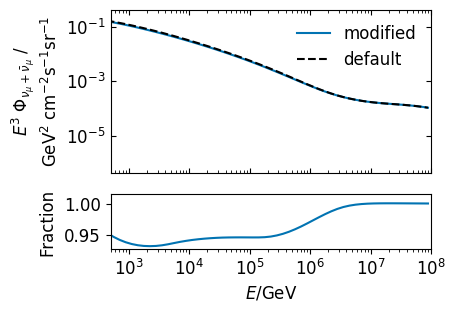

In [35]:
A4_width_inches = 0.5*8.27  # Width of A4 paper in inches
A4_height_inches = A4_width_inches * 0.75 # Height is one-third of width
figsize = (A4_width_inches, A4_height_inches)

# Create subplots using GridSpec
fig = plt.figure(figsize=figsize, dpi=500)
fig.tight_layout(pad=0.4)

# Create a gridspec with 2 rows and 1 column, where the second row will be narrow
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(A4_width_inches, A4_height_inches), sharex=True, height_ratios=[3,1 ])


# Plot lines with labels (same as before)
ax1.plot(E, E**3. * flux_mod , color=colors[0], label=r'modified')
ax1.plot(E, E**3. * flux_def , color='black', label=r'default',ls='--')


# Axes labels and text (same as before)
#ax1.set_xlabel('$E$/GeV')
ax1.set_ylabel(r'$E^{3}$ $\Phi_{\nu_\mu + \bar{\nu}_\mu}$ /' + '\n' + r'GeV$^{2}$ cm$^{-2}$s$^{-1}$sr$^{-1}$')
#ax1.text(0.35, 0.05, '$90^{\circ} \leq \Theta \leq 110^{\circ}$', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes, color=colors[3])
plt.setp(ax1.get_xticklabels(), visible=False) 

# Log scales and limits (same as before)
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim(50., 1e6)
#ax1.set_ylim(2e-4, 1.1e-1)
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=True)
ax1.tick_params(axis='y', which='both', direction='in', left=True, right=True)



ax1.legend( loc='upper right', frameon=False)


ax2.plot(E, flux_mod/flux_def,  color=colors[0])

ax2.set_xlabel('$E$/GeV')
ax2.set_ylabel('Fraction ')

# Set limits for the lower plot
ax2.set_xscale('log')
#ax2.set_ylim(-0.05, 1.05)
ax2.set_xlim(500., 1e8)


# Save the figure
plt.savefig(plot_dir+ "musurfacespectrum_def_vs_mod_0.2abc.pdf", bbox_inches='tight')


<Figure size 2067.5x1550.62 with 0 Axes>

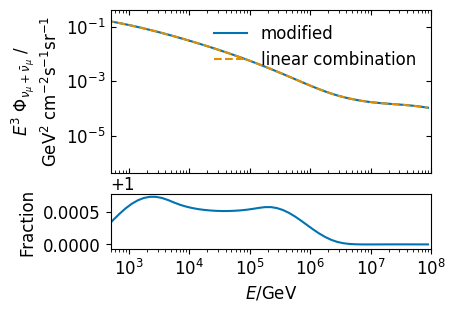

In [32]:
# test two modification approaches  (linearity)

flux_dphi = (dphi_a * 0.05 + dphi_b * 0.05 + dphi_c * 0.05)+flux_def

A4_width_inches = 0.5*8.27  # Width of A4 paper in inches
A4_height_inches = A4_width_inches * 0.75 # Height is one-third of width
figsize = (A4_width_inches, A4_height_inches)

# Create subplots using GridSpec
fig = plt.figure(figsize=figsize, dpi=500)
fig.tight_layout(pad=0.4)

# Create a gridspec with 2 rows and 1 column, where the second row will be narrow
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(A4_width_inches, A4_height_inches), sharex=True, height_ratios=[3,1 ])


# Plot lines with labels (same as before)
ax1.plot(E, E**3. * flux_mod , color=colors[0], label=r'modified')
ax1.plot(E, E**3. * flux_dphi[0] , color=colors[1], label=r'linear combination',ls='--')


# Axes labels and text (same as before)
#ax1.set_xlabel('$E$/GeV')
ax1.set_ylabel(r'$E^{3}$ $\Phi_{\nu_\mu + \bar{\nu}_\mu}$ /' + '\n' + r'GeV$^{2}$ cm$^{-2}$s$^{-1}$sr$^{-1}$')
#ax1.text(0.35, 0.05, '$90^{\circ} \leq \Theta \leq 110^{\circ}$', verticalalignment='bottom', horizontalalignment='right', transform=ax1.transAxes, color=colors[3])
plt.setp(ax1.get_xticklabels(), visible=False) 

# Log scales and limits (same as before)
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim(50., 1e6)
#ax1.set_ylim(2e-4, 1.1e-1)
ax1.minorticks_on()
ax1.tick_params(axis='x', which='both', direction='in', bottom=True, top=True)
ax1.tick_params(axis='y', which='both', direction='in', left=True, right=True)



ax1.legend( loc='upper right', frameon=False)


ax2.plot(E, flux_mod/flux_dphi[0],  color=colors[0])

ax2.set_xlabel('$E$/GeV')
ax2.set_ylabel('Fraction ')

# Set limits for the lower plot
ax2.set_xscale('log')
#ax2.set_ylim(-0.05, 1.05)
ax2.set_xlim(500., 1e8)


# Save the figure
plt.savefig(plot_dir+ "spectrumtest_modified_lincombi.pdf", bbox_inches='tight')


In [31]:
flux_mod/flux_dphi[0]

array([1.00001721, 1.00001583, 1.00001435, 1.00001294, 1.0000115 ,
       1.00000995, 1.00000849, 1.00000713, 1.00000594, 1.0000049 ,
       1.000004  , 1.00000321, 1.00000252, 1.00000191, 1.00000139,
       1.00000099, 1.00000079, 1.00000066, 0.99999995, 0.99999899,
       0.99999842, 0.99999868, 0.9999991 , 0.99999928, 0.99999893,
       0.99999752, 0.99999459, 0.99998996, 0.99998401, 0.99997783,
       0.99997345, 0.99997404, 0.99998354, 1.00000701, 1.00004977,
       1.00011425, 1.00019676, 1.0002888 , 1.00038331, 1.00047429,
       1.00055648, 1.00062595, 1.00067957, 1.00071563, 1.00073326,
       1.00073297, 1.00071529, 1.00068358, 1.00064531, 1.00061016,
       1.00058242, 1.00056047, 1.0005439 , 1.00053151, 1.00052269,
       1.00051699, 1.00051427, 1.00051488, 1.00051833, 1.00052463,
       1.00053428, 1.00054726, 1.00056232, 1.00057432, 1.00057507,
       1.00056014, 1.00053027, 1.00048615, 1.00043038, 1.0003666 ,
       1.00029876, 1.00023133, 1.00016881, 1.00011437, 1.00007

In [12]:
# plot dN/dNmu
d = 1.5
angle = 0.
X = sl_depth(d,angle)


threshold = 500
p1 = 0.05
p2 = 0.
p3 = 0.
season = "apr"

1e4*helper.mult_dist(X, angle,
                        pm.GlobalSplineFitBeta(),"yields_" + season, 
                        p1, p2,p3,
                        norm=False,threshold=threshold#))[0]
                    ) / helper.rates(X, angle, season, p1, p2, p3, threshold)

KeyError: 'Invalid key: (0.05, 0.0, 0.0), available keys: [(0.05, 0.05, 0.05)]'

In [10]:
def dNdN_mu(d, p1, p2, p3):
    
    angle = 0.
    X = sl_depth(d,angle)
    season = "apr"

    return 1e4*helper.mult_dist(X, angle,
                        pm.GlobalSplineFitBeta(),"yields_" + season, 
                        p1, p2,p3,
                        norm=False,threshold=threshold#))[0]
                    ) / helper.rates(X, angle, season, p1, p2, p3, threshold)

In [ ]:
# plot in log log for 1.5 km depth and 2.5k